Pre-class work

Sampling bias for bus waiting times

Suppose the interarrival time for a city bus has an exponential distribution with parameter $1/λ$. A passenger arrives at a uniformly random time and records the time until the next bus arrives. What is the expected waiting time? Use a simulation to get an answer. Is the answer surprising? Now suppose instead that the interarrival time is $U(0, 2λ)$. How does this change the situation? (Notice that the expected interarrival time is $λ$ in both cases.)

Note that there are 2 common, equivalent parameterizations of the exponential distribution.

○ Exponential $(x | λ) = λ e^{–λx}$. This is used in Shonkwiler & Mendivil.

○ Exponential $(x | β) = β^{–1} e^{–x / β}$. This is used in NumPy and SciPy. So if you import NumPy and generate exponentially distributed random values using `numpy.random.exponential(beta)`, you should use $β = λ^{–1}$.

This is an example of a difficult to compute value (the expected waiting time under two different distributions) with a counterintuitive result that can be simulated fairly easily.

https://colab.research.google.com/drive/17ip2phG8d02mYDuwKFtnsQcYXXGnEShE?usp=sharing

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

Expected passenger wait time: 1.0012822554906184


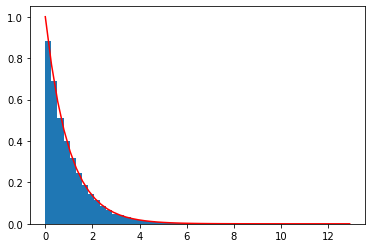

In [2]:
# interrarival time, exponential

trials = 100000  

# wait time for passenger
wait_times = []

for _ in range(trials):
    # uniformly at randome time
    passenger_arrival_time = np.random.uniform(0, 100)

    # interrarival time is exponential
    interarrival_times = np.random.exponential(1, size=1000)

    # to record time for next bus arriving
    bus_arrival_times = np.cumsum(interarrival_times)

    # obtaining the bus arrival time for the passenger arrival time
    index = bus_arrival_times.searchsorted(passenger_arrival_time)

    # time waiting is appended to wait times
    wait_times.append(bus_arrival_times[index] - passenger_arrival_time)

print('Expected passenger wait time:', np.mean(wait_times))
plt.hist(wait_times, bins=50, density=True)
x = np.linspace(0, max(wait_times))
plt.plot(x, sts.expon.pdf(x, scale=1/1), 'r-')
plt.show()

Expected passenger wait time: 0.6661571907984725


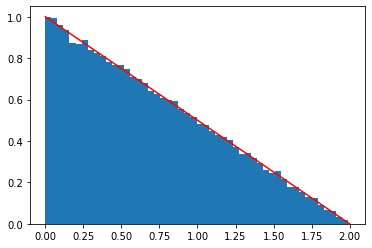

In [3]:
# interrarival time, uniform

trials = 100000 

wait_times = []

for _ in range(trials):
    # uniformly at random time
    passenger_arrival_time = np.random.uniform(0, 100)
    
    # interrarival time uniformly distributed U(0,2\lambda) \lambda = 1
    interarrival_times = np.random.uniform(0, 2, size=1000)

    # to record time for next bus arriving
    bus_arrival_times = np.cumsum(interarrival_times)

    # obtaining the bus arrival time for the passenger arrival time
    index = bus_arrival_times.searchsorted(passenger_arrival_time)

    # time waiting is appended to wait times list
    wait_times.append(bus_arrival_times[index] - passenger_arrival_time)

# Plot histogram 
print('Expected passenger wait time:', np.mean(wait_times))
plt.hist(wait_times, bins=50, density=True)
x = np.linspace(0, 2)
plt.plot(x, 1-x/2, 'r-')
plt.show()

Retirement benefit projection

At age 50 Fannie Mae has \$150,000 invested and will be investing another \$10,000 per year until age 70. Each year the investment grows according to an interest rate that is normally distributed with mean 8% and standard deviation 9%. At age 70, Fannie Mae then retires and withdraws \$65,000 per year until death. Below is given a conditional death probability table. Thus if Fannie Mae lives until age 70, then the probability of dying before age 71 is 0.04979. Simulate this process 1000 times and histogram the amount of money Fannie Mae has at death.

In [4]:
data = {50: 0.00832, 51 : 0.00911, 52 : 0.00996, 53 : 0.01089, 54 : 0.01190, 55 : 0.01300, 56 : 0.01421, 
        57: 0.01554, 58 : 0.01700, 59 : 0.01859, 60 : 0.02034, 61 : 0.02224, 62 : 0.02431, 63 : 0.02657, 
        64: 0.02904, 65 : 0.03175, 66 : 0.03474, 67 : 0.03804, 68 : 0.04168, 69 : 0.04561, 70 : 0.04979, 
        71: 0.05415, 72 : 0.05865, 73 : 0.06326, 74 : 0.06812, 75 : 0.07337, 76 : 0.07918, 77 : 0.08570, 
        78: 0.09306, 79 : 0.10119, 80 : 0.10998, 81 : 0.11935, 82 : 0.12917, 83 : 0.13938, 84 : 0.15001, 
        85: 0.16114, 86 : 0.17282, 87 : 0.18513, 88 : 0.19825, 89 : 0.21246, 90 : 0.22814, 91 : 0.24577, 
        92: 0.26593, 93 : 0.28930, 94 : 0.31666, 95 : 0.35124, 96 : 0.40056, 97 : 0.48842, 98 : 0.66815, 
        99: 0.72000, 100: 0.76000, 101: 0.80000, 102: 0.85000, 103: 0.90000, 104: 0.96000, 105: 1.00000}

In [5]:
trials = list(range(1, 1000))

In [6]:
years_to_invest = list(range(50,71))

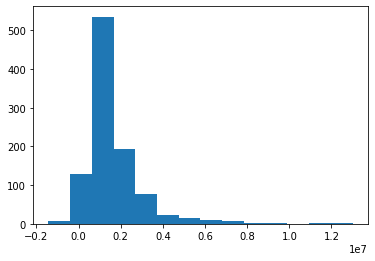

In [7]:
import numpy as np
import matplotlib.pyplot as plt

begin_age = 50
old_age = 70
invested = 150000
to_invest = 10000
mean = 0.08
standard_deviation = 0.09
no_trials = 1000
withdrawal = 65000
years_investing = 20

at_death = []
for _ in range(no_trials):
    # at age 50 Fannie Mae 
    age = begin_age
    # has $150,000 invested
    total_invested = invested

    # will be investing $10,000 until 70
    for year in range(years_investing):
        # investment grows at mean 8% and std 9%
        growth = np.random.normal(mean, standard_deviation)
        total_invested = total_invested * (1 + growth) + to_invest
        age += 1

    while True:
        if np.random.uniform(0, 1) < data[age]:
            at_death.append(total_invested)
            break
        growth = np.random.normal(mean, standard_deviation)
        total_invested = total_invested * (1 + growth) - withdrawal
        age += 1

plt.hist(at_death, bins = 14)
plt.show()

Mortality table, probability of dying during the year by age∗

age | prob | age | prob | age | prob | age | prob
--- | ---- | --- | ---- | --- | ---- | --- | ----
 50 | 0.00832 | 64 | 0.02904 | 78 | 0.09306 | 92 | 0.26593 | 
 51 | 0.00911 | 65 | 0.03175 | 79 | 0.10119 | 93 | 0.28930 | 
 52 | 0.00996 | 66 | 0.03474 | 80 | 0.10998 | 94 | 0.31666 | 
 53 | 0.01089 | 67 | 0.03804 | 81 | 0.11935 | 95 | 0.35124 | 
 54 | 0.01190 | 68 | 0.04168 | 82 | 0.12917 | 96 | 0.40056 | 
 55 | 0.01300 | 69 | 0.04561 | 83 | 0.13938 | 97 | 0.48842 | 
 56 | 0.01421 | 70 | 0.04979 | 84 | 0.15001 | 98 | 0.66815 | 
 57 | 0.01554 | 71 | 0.05415 | 85 | 0.16114 | 99 | 0.72000 | 
 58 | 0.01700 | 72 | 0.05865 | 86 | 0.17282 | 100| 0.76000 | 
 59 | 0.01859 | 73 | 0.06326 | 87 | 0.18513 | 101| 0.80000 | 
 60 | 0.02034 | 74 | 0.06812 | 88 | 0.19825 | 102| 0.85000 | 
 61 | 0.02224 | 75 | 0.07337 | 89 | 0.21246 | 103| 0.90000 | 
 62 | 0.02431 | 76 | 0.07918 | 90 | 0.22814 | 104| 0.96000 | 
 63 | 0.02657 | 77 | 0.08570 | 91 | 0.24577 | 105| 1.0000  | 
